In [1]:
# 분석에 필요한 라이브러리를 호출 
import pandas as pd # 정형데이터를 전처리 / 통계 연산 수행  
import seaborn as sns  # 통계적 시각화 연산 
import matplotlib as mpl # 시각화 옵션 (외부 옵션)
import matplotlib.pyplot as plt # 시각화 옵션 (내부 옵션)
import plotly.express as px # 동적 그래프 시각화 
import scipy.stats as stats # 통계적 가설 검정 수행 

mpl.rc('font', family='Malgun Gothic') 
# 한글 글꼴 설정 (mac : AppleGothic)

1. df1 데이터에 대해 'Amount_Month'(월랜탈비용) 데이터에 'Term'(계약기간)데이터를 곱하여, 계약기간동안 한명의 총 납부금액 'Total_Amount'변수를 선언

2. 'Total_Amount'값에 따라 고객의 등급을 나누고자 한다. 'Total_Amount'가 600000만 이상 고객은 'VIP' ,나머지 고객은 'Special'분류하여 파생변수 'Member_Rank' 를 생성

3. 앞서 계산한 'Member_Rank'에서 'VIP'고객의 특성을 파악하고자 한다. 'Channel'유입 경로 별 'Total_Amount'의 평균과 합을 계산한 뒤, 시각화

4. 'Member_Rank'고객 등급에서 Special 고객들의 특성을 파악하고자 한다.

###### 고객의 등급과 제품군의 빈도수를 나타내는 그래프를 시각화
##### Special 고객들의 성별'Gender'에 따른 'Total_Amount'의 평균의 차이가 있는지 가설검정을 수행

5. 'Datetime'데이터를 이용해 '연도'를 계산하고, 'Product_Type'별 연도에 따른 'Total_Amount'값의 합을 계산한뒤, 2019년도 대비 2020년도 총 계약금액의 증감율을 계산

In [2]:
df1 = pd.read_csv('01_Data.csv')

In [3]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,개인,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,개인,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,개인,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드


In [4]:
df1['Total_Amount'] = df1['Amount_Month']*df1['Term']

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          51301 non-null  int64  
 1   Member_ID      51301 non-null  int64  
 2   Sales_Type     51301 non-null  object 
 3   Contract_Type  51301 non-null  object 
 4   Channel        51301 non-null  object 
 5   Datetime       51301 non-null  object 
 6   Term           51301 non-null  int64  
 7   Payment_Type   51301 non-null  object 
 8   Product_Type   51301 non-null  object 
 9   Amount_Month   51301 non-null  int64  
 10  Customer_Type  51299 non-null  object 
 11  Age            44329 non-null  float64
 12  Address1       51299 non-null  object 
 13  Address2       51299 non-null  object 
 14  State          51301 non-null  object 
 15  Overdue_count  51301 non-null  int64  
 16  Overdue_Type   51301 non-null  object 
 17  Gender         51301 non-null  object 
 18  Credit

In [6]:
print(df1['Total_Amount'].quantile(0.9), df1['Total_Amount'].quantile(0.7))

6354000.0 5814000.0


2. 'Total_Amount'값에 따라 고객의 등급을 나누고자 한다. 'Total_Amount'가 상위 10%인 고객은 'VIP' , 상위 30%인 고객은 'Special', 나머지 고객은 'Normal'로 분류하여 파생변수 'Member_Rank' 를 생성

In [8]:
def func1(row):
    if row >= df1['Total_Amount'].quantile(0.9):
        return 'VIP'
    elif row >= df1['Total_Amount'].quantile(0.7):
        return 'Special'
    else:
        return 'Nomal'

df1['Member_Rank'] = df1['Total_Amount'].apply(func1)
df1['Member_Rank'].value_counts()

Special    21145
Nomal      20909
VIP         9247
Name: Member_Rank, dtype: int64

cond1 = df1['Total_Amount']>=df1['Total_Amount'].quantile(0.9)
cond2 = df1['Total_Amount']>=df1['Total_Amount'].quantile(0.7)

df1.loc[cond1,'Member_Rank']='VIP'
df1.loc[cond2,'Member_Rank']='Special'
 df1.loc[~(cond1&cond2),'Member_Rank']='Normal'

 df1['Total_Amount'].quantile(0.9)
df1['Member_Rank'].value_counts()

2-1. 'Total_Amount'값에 따라 고객의 등급을 나누고자 한다. 'Total_Amount'가 600000만 이상 고객은 'VIP' ,나머지 고객은 'Special'분류하여 파생변수 'Member_Rank' 를 생성

In [ ]:
def func1(row):
    if row >= 6000000:
        return 'VIP'
    elif row >= 4000000:
        return 'Special'
    else:
        return 'Nomal'

df1['Member_rank'] = df1['Total_Amount'].apply(func1)

df1['Member_Rank'].value_counts()

cond1 = (df1['Total_Amount'] >= 600000)
cond2 = (df1['Total_Amount'] <= 600000)

df1[cond1] ='VIP'
df1[cond2] ='Special'
#df1.loc[cond2,'Member_rank']='Special'
df1

#df1.info()
df1['Member_rank'].value_counts()

3. 앞서 계산한 'Member_Rank'에서 'VIP'고객의 특성을 파악하고자 한다. 'Channel'유입 경로 별 'Total_Amount'의 평균과 합을 계산한 뒤, 시각화

In [17]:
df1['Total_Amount']
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000,Special
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800,Nomal
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800,Nomal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000,Special
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000,Special
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100,Nomal
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000,Special


In [20]:
df1.pivot_table(index='Channel', values='Total_Amount', aggfunc=['mean','sum'])

,mean,sum
,Total_Amount,Total_Amount
Channel,,
대형마트A,5.375118e+06,25397433900
대형마트C,3.605675e+06,429075360
대형마트E,5.947065e+06,8902756800
대형마트H,6.001520e+06,1350342000
대형마트N,2.779937e+06,230734800
영업방판,5.881123e+06,139776651000
자체홈페이지,5.883570e+06,706028400
재계약,8.084389e+05,1772906400


<AxesSubplot:xlabel='Total_Amount', ylabel='Channel'>

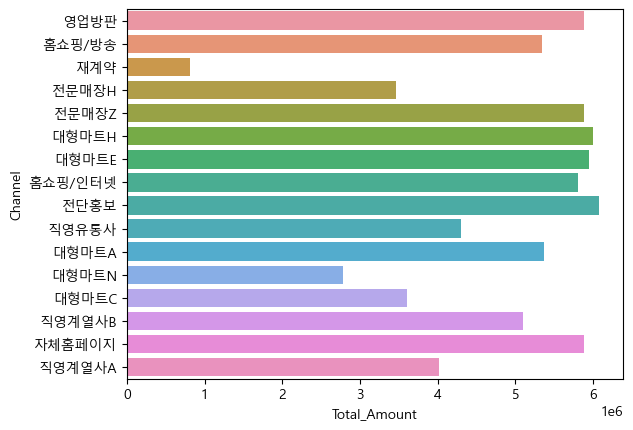

In [19]:
sns.barplot(data=df1, y='Channel', x='Total_Amount',ci=None)

4. 'Member_Rank'고객 등급에서 Special 고객들의 특성을 파악하고자 한다.
###### 고객의 등급과 제품군의 빈도수를 나타내는 그래프를 시각화
##### Special 고객들의 성별'Gender'에 따른 'Total_Amount'의 평균의 차이가 있는지 가설검정을 수행

In [28]:
df1['Gender'].value_counts()

여자    35602
남자    15699
Name: Gender, dtype: int64

In [30]:
df1.pivot_table(index='Gender',values='Total_Amount',aggfunc='mean')

,Total_Amount
Gender,
남자,5.421803e+06
여자,5.268472e+06


In [32]:
stats.normaltest(df1['Total_Amount'])

NormaltestResult(statistic=16786.98559532332, pvalue=0.0)

In [40]:
# 4) Special 고객들의 성별'Gender'에 따른 'Total_Amount'의 평균의 차이가 있는지 가설검정을 수행
# 귀무 가설 : 평균의 차이가 없다.
# 대립 가설 : 평균의 차이가 있다
cond1 = (df1['Gender']=='여자')
cond2 = (df1['Gender']=='남자')

df_female = df1.loc[cond1]
df_male=df1.loc[cond2]

stats.ranksums(df_female['Total_Amount'], df_male['Total_Amount'])

# P.value > 0.05 / 대립가설 참 / 두 집단 간 평균의 있다.

RanksumsResult(statistic=-8.083971831672981, pvalue=6.269081796196821e-16)

5. 'Datetime'데이터를 이용해 '연도'를 계산하고, 'Product_Type'별 연도에 따른 'Total_Amount'값의 합을 계산한뒤, 2019년도 대비 2020년도 총 계약금액의 증감율을 계산

In [66]:
df1['DT']=pd.to_datetime(df1['Datetime'], format='%Y-%m-%d')
df1['YY']= df1['DT'].dt.year
df1['mm']= df1['DT'].dt.month
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank,DT,YY,mm,yy
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,없음,여자,9.0,새마을금고,5814000,Special,2019-05-06,2019,5,1970-01-01 00:00:00.000001970
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,없음,남자,2.0,현대카드,6174000,Special,2020-02-20,2020,2,1970-01-01 00:00:00.000001970
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,없음,여자,8.0,우리은행,5814000,Special,2019-02-28,2019,2,1970-01-01 00:00:00.000001970
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,없음,남자,5.0,농협회원조합,802800,Nomal,2019-05-13,2019,5,1970-01-01 00:00:00.000001970
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,있음,남자,8.0,농협회원조합,802800,Nomal,2019-05-10,2019,5,1970-01-01 00:00:00.000001970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,없음,남자,NaN,기업은행,5814000,Special,2019-03-01,2019,3,1970-01-01 00:00:00.000001970
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,없음,여자,8.0,새마을금고,5814000,Special,2019-04-01,2019,4,1970-01-01 00:00:00.000001970
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,없음,여자,1.0,롯데카드,4715100,Nomal,2019-04-01,2019,4,1970-01-01 00:00:00.000001970
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,없음,여자,2.0,롯데카드,5814000,Special,2020-02-06,2020,2,1970-01-01 00:00:00.000001970


In [72]:
p1=df1.pivot_table(index='Product_Type',columns='YY',values='Total_Amount',aggfunc='sum')

In [70]:
df1['YY']


0        2019
1        2020
2        2019
3        2019
4        2019
         ... 
51296    2019
51297    2019
51298    2019
51299    2020
51300    2019
Name: YY, Length: 51301, dtype: int64

In [73]:
p1['증감율'] = (p1[2020]-p1[2019])/p1[2019]
p1

YY,2019,2020,증감율
Product_Type,,,
DES-1,167173962120,42612206976,-0.745103
DES-2,35856775800,8887944960,-0.752126
DES-3A,9361251360,2384535600,-0.745276
DES-R4,2007975600,506232000,-0.747889
ERA,2454835500,552672900,-0.774864
MMC,684063900,202562100,-0.703884


In [41]:
df1['Datetime']

0        2019-05-06
1        2020-02-20
2        2019-02-28
3        2019-05-13
4        2019-05-10
            ...    
51296    2019-03-01
51297    2019-04-01
51298    2019-04-01
51299    2020-02-06
51300    2019-04-24
Name: Datetime, Length: 51301, dtype: object